In [10]:
!pip install -U nltk
!pip install -U spacy
!pip install --upgrade gensim
!pip install -U textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 34.9 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 45.7 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.4.4
    Uninstalling spacy-3.4.4:
      Successfully uninstalled spacy-3.4.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.4.1 requires spacy<3.5.0,>=3.4.0, but you have spacy 3.5.0 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/

As always, we first import the loader function for the 20 newsgroups data, as
follows

In [4]:
from sklearn.datasets import fetch_20newsgroups

Then, we download the dataset with all the default parameters, as follows

In [5]:
groups = fetch_20newsgroups()

The data object is in the form of a
key-value dictionary. Its keys are as follows

In [6]:
groups.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

The target_names key gives the newsgroups names

In [7]:
groups['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

The target key corresponds to a newsgroup, but is encoded as an integer

In [8]:
groups.target

array([7, 4, 4, ..., 3, 1, 8])

Then, what are the distinct values for these integers? We can use the unique function
from NumPy to figure it out

In [9]:
import numpy as np
np.unique(groups.target)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

We will use the seaborn package (https://seaborn.pydata.org/) to compute the
histogram of categories and plot it utilizing the matplotlib package (https://
matplotlib.org/). We can install both packages via pip as follows

In [20]:
!python -m pip uninstall matplotlib
!pip install matplotlib==3.1.3
!pip install seaborn

Found existing installation: matplotlib 3.6.3
Uninstalling matplotlib-3.6.3:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/matplotlib-3.6.3-py3.8-nspkg.pth
    /usr/local/lib/python3.8/dist-packages/matplotlib-3.6.3.dist-info/*
    /usr/local/lib/python3.8/dist-packages/matplotlib/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.8/dist-packages/pylab.py
Proceed (Y/n)? Y
  Successfully uninstalled matplotlib-3.6.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 72.7 MB/s eta 0:00:00


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Now, let's display the distribution of the classes, as follows

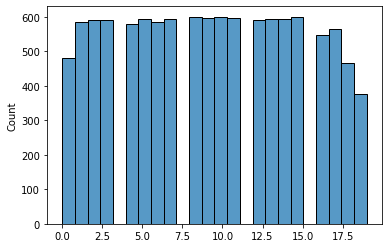

In [10]:
import seaborn as sns
sns.histplot(groups.target)
import matplotlib.pyplot as plt
plt.show()

Now, let's now have a look at the first document and its topic number and name by
executing the following command

In [11]:
groups.data[0]
groups.target[0]
groups.target_names[groups.target[0]]

'rec.autos'

We are utilizing
the CountVectorizer class from scikit-learn to do the work

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

We first initialize the count vectorizer with 500 top features

In [13]:
count_vector = CountVectorizer(max_features=500)

Use it to fit on the raw text data as follows

In [14]:
data_count = count_vector.fit_transform(groups.data)

Now the count vectorizer captures the top 500 features and generates a token count
matrix out of the original text input

In [15]:
data_count
data_count[0]

<1x500 sparse matrix of type '<class 'numpy.int64'>'
	with 53 stored elements in Compressed Sparse Row format>

what are those 500 top features? They can be found in the following output

In [17]:
print(count_vector.get_feature_names())

['00', '000', '10', '100', '11', '12', '13', '14', '145', '15', '16', '17', '18', '19', '1993', '20', '21', '22', '23', '24', '25', '26', '27', '30', '32', '34', '40', '50', '93', 'a86', 'able', 'about', 'above', 'ac', 'access', 'actually', 'address', 'after', 'again', 'against', 'ago', 'all', 'already', 'also', 'always', 'am', 'american', 'an', 'and', 'andrew', 'another', 'answer', 'any', 'anyone', 'anything', 'apple', 'apr', 'april', 'are', 'armenian', 'around', 'article', 'as', 'ask', 'at', 'au', 'available', 'away', 'ax', 'b8f', 'back', 'bad', 'based', 'be', 'because', 'been', 'before', 'being', 'believe', 'best', 'better', 'between', 'bible', 'big', 'bill', 'bit', 'book', 'both', 'but', 'buy', 'by', 'ca', 'call', 'called', 'came', 'can', 'canada', 'cannot', 'car', 'card', 'case', 'cc', 'center', 'change', 'children', 'chip', 'christian', 'clipper', 'co', 'code', 'color', 'com', 'come', 'computer', 'control', 'could', 'course', 'cs', 'current', 'data', 'david', 'day', 'days', 'de',

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


The filter function
is defined as follows

In [18]:
data_cleaned = []
for doc in groups.data:
  doc_cleaned = ' '.join(word for word in doc.split()if word.isalpha())
  data_cleaned.append(doc_cleaned)

Take scikit-learn as an
example—you can check the list as follows

In [22]:
from sklearn.feature_extraction import _stop_words
print(_stop_words.ENGLISH_STOP_WORDS)

frozenset({'others', 'cannot', 'ours', 'nevertheless', 'afterwards', 'fifteen', 'hereby', 'from', 'whence', 'etc', 'she', 'eg', 'when', 'same', 'while', 'call', 'your', 'several', 'himself', 'fill', 'whereupon', 'done', 'how', 'neither', 'so', 'former', 'amoungst', 'before', 'also', 'behind', 'back', 'besides', 'for', 'of', 'because', 'sixty', 'four', 'below', 'among', 'per', 'side', 'see', 'hereupon', 'further', 'another', 'very', 'myself', 'ltd', 'bottom', 'many', 'an', 'alone', 'what', 'everything', 'thin', 'eight', 'much', 'must', 'becomes', 'since', 'thick', 'one', 'beside', 'few', 'often', 'it', 'therein', 'if', 'though', 'forty', 'thereafter', 'had', 'who', 'anyone', 'that', 'sometimes', 'herein', 'might', 'even', 'do', 'every', 'co', 'noone', 'keep', 'anyway', 'found', 'those', 'no', 'again', 'its', 'into', 'therefore', 'whereas', 'still', 'too', 'around', 'due', 'but', 'am', 'whether', 'any', 'whose', 'through', 'hundred', 'full', 'interest', 'most', 'next', 'whoever', 'off', 

from sklearn.manifold import TSNE

First, just load documents of these three labels, as follows

In [28]:
from sklearn.manifold import TSNE
categories_3 = ['talk.religion.misc', 'comp.graphics', 'sci.space']
groups_3 = fetch_20newsgroups(categories=categories_3)